### R workflow:  
```
We organise our analyses in R as follows:

(0) Check the data source file / format in advance and pre-process if necessary.  
(1) Preparation: import libraries that we'll need for the analyses.  
(2) Set-up: import the data set, and do some initial checks.  
(3) Data management:  set data types/ restructure/subset data as needed.  
(4) Data exploration: visualisation for assessing patterns/associations.  
(5) Fit statistical model:  
    (a) assess model assumptions  
    (b) statistical inference  
    (c) obtain estimates of treatment effects (plus/minus uncertainty)  
(6) Graphical or tabular summary of statistical model.
```

## 1. Set up libraries

In [1]:
# Linear Mixed Effects Models
# install.packages("lmerTest") 

# Providing an easier way to both create and view diagnostic plots for models in R.
# install.packages("ggResidpanel") 

# Estimated Marginal Means, aka Least-Squares Means
# install.packages("emmeans")

# The following libs may need to install as requirements of above installations
# install.packages("lme4")
# install.packages("Matrix")
# install.packages("statmod")

## 2. Import data and check data structure

In [2]:
#library(readxl)
#library(janitor)
library(ggplot2)
library(tidyr)
library(dplyr)
library(lmerTest)
library(ggResidpanel)
library(emmeans)

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lmerTest' was built under R version 3.6.3"Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning message:
"package 'ggResidpanel' was built under R version 3.6.3"

In [3]:
df <- read.csv("data/combined_avg_licks_data.csv")
str(df)

'data.frame':	492 obs. of  7 variables:
 $ animal_id        : Factor w/ 44 levels "ETF1","ETF10",..: 1 1 1 1 1 1 4 4 4 4 ...
 $ prenatal_exposure: Factor w/ 2 levels "alcohol","free choice liquid diet": 1 1 1 1 1 1 1 1 1 1 ...
 $ weight           : int  59 59 59 59 59 59 68 68 68 68 ...
 $ sex              : Factor w/ 2 levels "female","male": 1 1 1 1 1 1 1 1 1 1 ...
 $ concentration    : num  0 0.1 0.3 1 3 6 0 0.1 0.3 1 ...
 $ avgLicks         : num  54.5 54.8 34.4 46.2 13.6 ...
 $ stimulus         : Factor w/ 2 levels "nicotine","sucrose": 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
dim(df)
head(df, 3)
tail(df, 3)

[1] 492   7

animal_id,prenatal_exposure,weight,sex,concentration,avgLicks,stimulus
ETF1,alcohol,59,female,0.0,54.5,nicotine
ETF1,alcohol,59,female,0.1,54.8,nicotine
ETF1,alcohol,59,female,0.3,34.4,nicotine


,animal_id,prenatal_exposure,weight,sex,concentration,avgLicks,stimulus
490,FCM11,free choice liquid diet,59,male,0.2,22.45455,sucrose
491,FCM11,free choice liquid diet,59,male,0.3,54.36364,sucrose
492,FCM11,free choice liquid diet,59,male,0.6,58.09091,sucrose


```
Check that you understand how the data are set up, how many observations there are in each group, etc. typically by
constructing some kind of summary table.
```

In [5]:
df_1 <- df %>%
            group_by(prenatal_exposure, sex, stimulus) %>%
            summarise(count = n()) %>%  # summarise(mean(count = n()))  
            ungroup()  
dim(df_1)
df_1

`summarise()` has grouped output by 'prenatal_exposure', 'sex'. You can override using the `.groups` argument.


[1] 8 4

prenatal_exposure,sex,stimulus,count
alcohol,female,nicotine,54
alcohol,female,sucrose,66
alcohol,male,nicotine,60
alcohol,male,sucrose,66
free choice liquid diet,female,nicotine,60
free choice liquid diet,female,sucrose,66
free choice liquid diet,male,nicotine,54
free choice liquid diet,male,sucrose,66


In [6]:
df$prenatal_exposure <- factor(df$prenatal_exposure,
                               levels = c('free choice liquid diet', 'alcohol'))

df$stimulus <- factor(df$stimulus,
                      levels = c('sucrose', 'nicotine'))
str(df)

'data.frame':	492 obs. of  7 variables:
 $ animal_id        : Factor w/ 44 levels "ETF1","ETF10",..: 1 1 1 1 1 1 4 4 4 4 ...
 $ prenatal_exposure: Factor w/ 2 levels "free choice liquid diet",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ weight           : int  59 59 59 59 59 59 68 68 68 68 ...
 $ sex              : Factor w/ 2 levels "female","male": 1 1 1 1 1 1 1 1 1 1 ...
 $ concentration    : num  0 0.1 0.3 1 3 6 0 0.1 0.3 1 ...
 $ avgLicks         : num  54.5 54.8 34.4 46.2 13.6 ...
 $ stimulus         : Factor w/ 2 levels "sucrose","nicotine": 2 2 2 2 2 2 2 2 2 2 ...


## 3. Data exploration  
Think of a few different ways to explore your data, keeping mind your research question.

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"

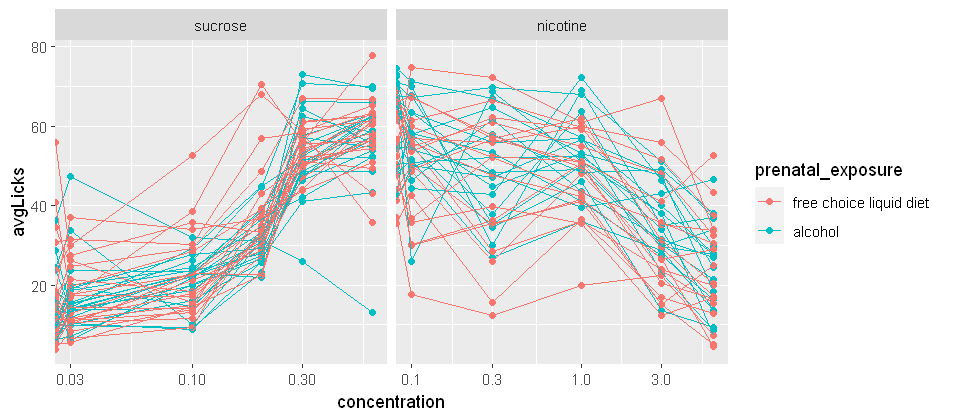

In [7]:
options(repr.plot.width = 8, repr.plot.height = 3.5)

ggplot(df, aes(x = concentration,
               y = avgLicks,
               color = prenatal_exposure,
               group = animal_id)
      ) +
    geom_point() +
    geom_line() +
    scale_x_log10() +
    facet_wrap(~stimulus, scale = 'free_x')

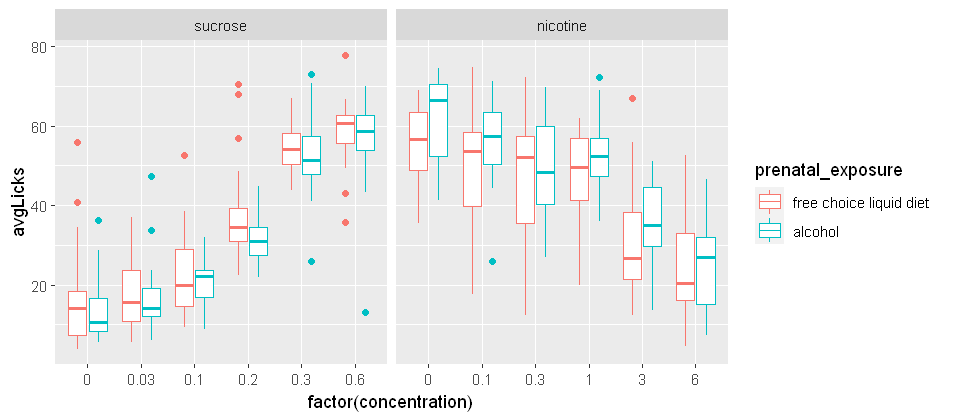

In [8]:
ggplot(df, aes(x = factor(concentration),
               y = avgLicks,
               color = prenatal_exposure)
      ) +
    geom_boxplot() +
    facet_wrap(~stimulus, scale = 'free_x')

## 4. Modeling

In [9]:
# Fit a model to these data to address the research question. 
# This should respect your experimental design, include blocking factors, etc.

### 4.1. nicotine modeling

In [10]:
nicotine <- df %>% filter(stimulus == 'nicotine')

lm1 <- lmer(avgLicks ~ prenatal_exposure* concentration + sex + weight + (1|animal_id),
            data = nicotine)

#### Use the anova() function to get the ANOVA table. Interpret the table.

In [11]:
anova(lm1)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
prenatal_exposure,565.7969,565.7969,1,42.10592,5.535568,2.338082e-02
concentration,29218.0992,29218.0992,1,188.00000,285.860131,1.356011e-39
sex,129.8036,129.8036,1,34.00000,1.269955,2.676660e-01
weight,234.7147,234.7147,1,34.00000,2.296370,1.389194e-01
prenatal_exposure:concentration,157.9773,157.9773,1,188.00000,1.545597,2.153348e-01


#### Assess model assumptions with residual plots using resid_panel()

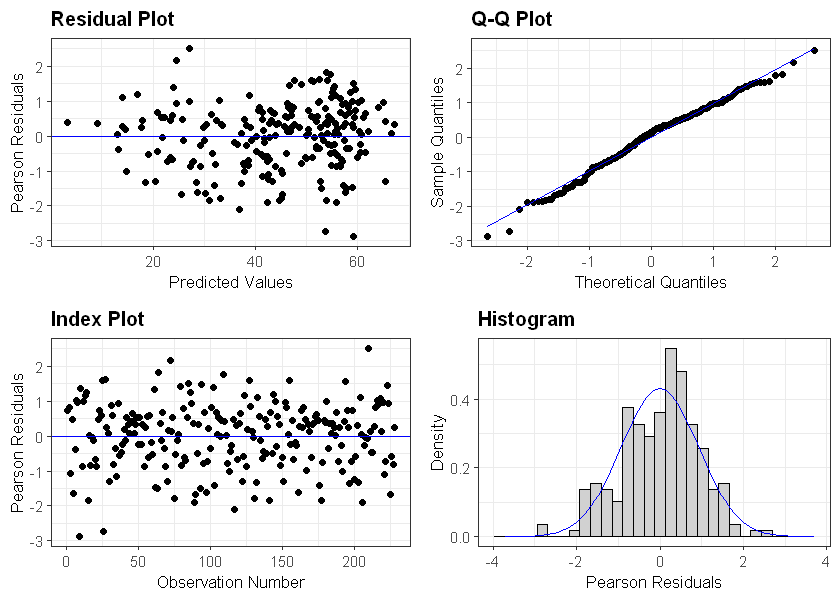

In [12]:
options(repr.plot.width = 7, repr.plot.height = 5)

resid_panel(lm1)

#### Transform if necessary and repeat.

Compare what you see in the anova table with your exploratory graphs, to get a sense of the story your data is telling.


Look at parameter estimates and between-Experiment variation using the summary() function

In [13]:
summary(lm1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avgLicks ~ prenatal_exposure * concentration + sex + weight +  
    (1 | animal_id)
   Data: nicotine

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8781 -0.6190  0.1340  0.6053  2.5169 

Random effects:
 Groups    Name        Variance Std.Dev.
 animal_id (Intercept)  60.94    7.807  
 Residual              102.21   10.110  
Number of obs: 228, groups:  animal_id, 38

Fixed effects:
                                       Estimate Std. Error       df t value
(Intercept)                             19.8886    20.9628  34.0893   0.949
prenatal_exposurealcohol                 7.8875     3.3524  42.1059   2.353
concentration                           -4.8486     0.4377 188.0000 -11.076
sexmale                                 -3.6366     3.2270  34.0000  -1.127
weight                                   0.4351     0.2872  34.0000   1.515
prenata

#### Obtain mean estimates and standard errors for plotting using the emmeans() function

In [14]:
emmeans(lm1, ~ concentration | prenatal_exposure,
        at = list(concentration = c(0.1, 0.3, 1, 3, 6)))

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed


prenatal_exposure = free choice liquid diet:
 concentration emmean   SE   df lower.CL upper.CL
           0.1   49.2 2.26 41.9     44.7     53.8
           0.3   48.2 2.23 40.0     43.7     52.7
           1.0   44.8 2.16 35.5     40.5     49.2
           3.0   35.1 2.21 38.7     30.7     39.6
           6.0   20.6 2.84 95.6     15.0     26.2

prenatal_exposure = alcohol:
 concentration emmean   SE   df lower.CL upper.CL
           0.1   57.0 2.26 41.9     52.5     61.6
           0.3   55.9 2.23 40.0     51.4     60.4
           1.0   52.0 2.16 35.5     47.6     56.3
           3.0   40.7 2.21 38.7     36.2     45.2
           6.0   23.9 2.84 95.6     18.2     29.5

Results are averaged over the levels of: sex 
Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 

In [15]:
emmeans(lm1, ~ prenatal_exposure | concentration,
        at = list(concentration = c(0.1, 0.3, 1, 3, 6)))

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed


concentration = 0.1:
 prenatal_exposure       emmean   SE   df lower.CL upper.CL
 free choice liquid diet   49.2 2.26 41.9     44.7     53.8
 alcohol                   57.0 2.26 41.9     52.5     61.6

concentration = 0.3:
 prenatal_exposure       emmean   SE   df lower.CL upper.CL
 free choice liquid diet   48.2 2.23 40.0     43.7     52.7
 alcohol                   55.9 2.23 40.0     51.4     60.4

concentration = 1.0:
 prenatal_exposure       emmean   SE   df lower.CL upper.CL
 free choice liquid diet   44.8 2.16 35.5     40.5     49.2
 alcohol                   52.0 2.16 35.5     47.6     56.3

concentration = 3.0:
 prenatal_exposure       emmean   SE   df lower.CL upper.CL
 free choice liquid diet   35.1 2.21 38.7     30.7     39.6
 alcohol                   40.7 2.21 38.7     36.2     45.2

concentration = 6.0:
 prenatal_exposure       emmean   SE   df lower.CL upper.CL
 free choice liquid diet   20.6 2.84 95.6     15.0     26.2
 alcohol                   23.9 2.84 95.6     18.2 

#### Create a graphic summarising the model means

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed
Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"

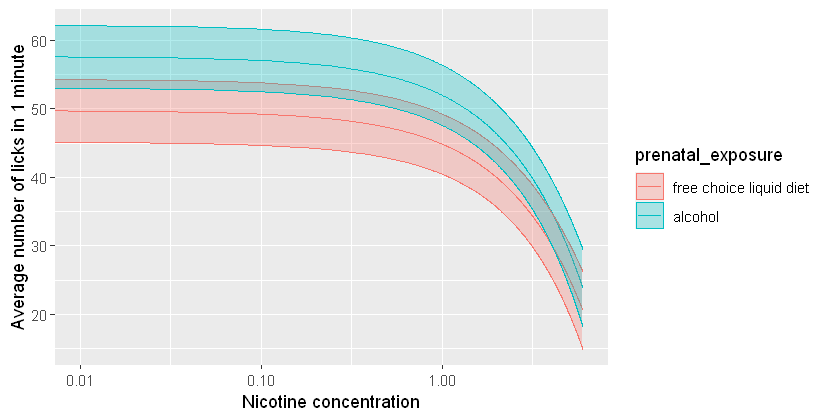

In [16]:
options(repr.plot.width = 7, repr.plot.height = 3.5)

em1 <- emmeans(lm1, ~prenatal_exposure * concentration,
               at = list(concentration = seq(0, 6, 0.01))
              ) %>% 
        as_tibble()
# str(em1)

ggplot(em1, aes(x = concentration, 
                y = emmean,
                color = prenatal_exposure)) +
    geom_line() + 
    geom_ribbon(aes(ymin = lower.CL, ymax=upper.CL, fill = prenatal_exposure), alpha=0.3) +
    scale_x_log10() + 
    labs(x = 'Nicotine concentration',
         y = "Average number of licks in 1 minute")

#### Describe the outcome of your model in words (i.e., in the way that you might in the results section of a publication):

### 4. 2. Exercise -- try this for sucrose 
Make a model  
Look at its residuals and anova  
look at its emmeans  
Make a output plot from the model  


In [17]:
sucrose <- df %>% filter(stimulus == 'sucrose')

lm1 <- lmer(avgLicks ~ prenatal_exposure* concentration + sex + weight + (1|animal_id),
            data = sucrose)

In [18]:
anova(lm1)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
prenatal_exposure,264.380319,264.380319,1,74.7096,2.34702114,1.297465e-01
concentration,65422.220662,65422.220662,1,218.0000,580.78201835,2.126956e-63
sex,9.313682,9.313682,1,40.0000,0.08268168,7.751802e-01
weight,86.847915,86.847915,1,40.0000,0.77098739,3.851557e-01
prenatal_exposure:concentration,4.119437,4.119437,1,218.0000,0.03657007,8.485210e-01


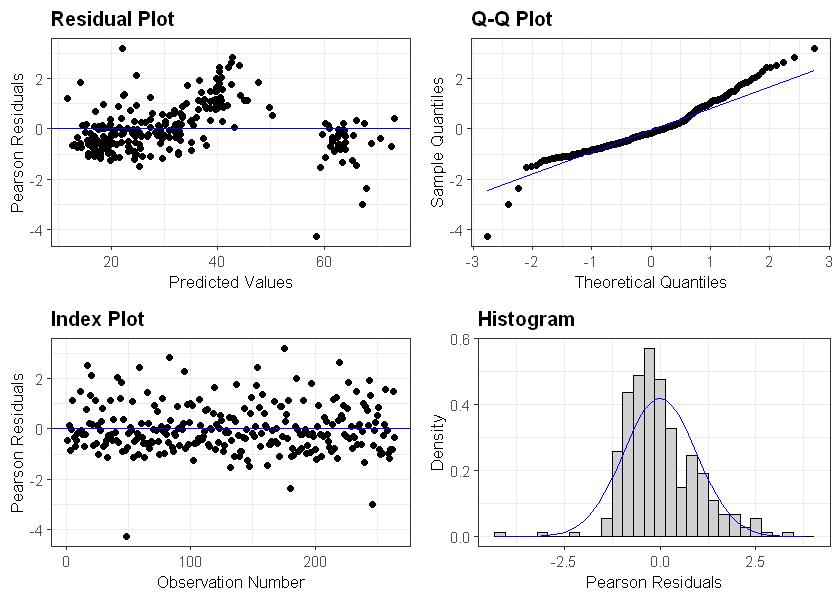

In [19]:
options(repr.plot.width = 7, repr.plot.height = 5)

resid_panel(lm1)

In [20]:
summary(lm1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avgLicks ~ prenatal_exposure * concentration + sex + weight +  
    (1 | animal_id)
   Data: sucrose

REML criterion at convergence: 2004

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2670 -0.6200 -0.1638  0.4847  3.2057 

Random effects:
 Groups    Name        Variance Std.Dev.
 animal_id (Intercept)  18.24    4.271  
 Residual              112.65   10.613  
Number of obs: 264, groups:  animal_id, 44

Fixed effects:
                                       Estimate Std. Error       df t value
(Intercept)                             30.6078    13.5409  40.3799   2.260
prenatal_exposurealcohol                -3.8215     2.4945  74.7096  -1.532
concentration                           76.6999     4.5369 218.0000  16.906
sexmale                                  0.5379     1.8707  40.0000   0.288
weight                                  -0.1864     0.2123  40.0000  -0.878
prenatal_e

Cannot use mode = "kenward-roger" because *pbkrtest* package is not installed


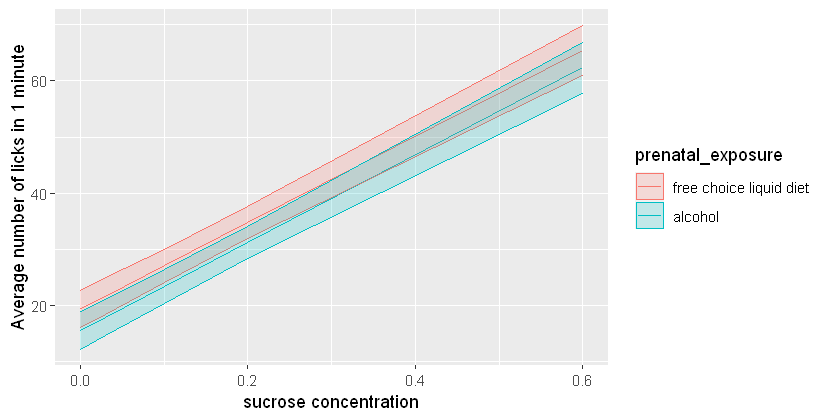

In [21]:
options(repr.plot.width = 7, repr.plot.height = 3.5)
 
em1 <- emmeans(lm1, ~ concentration * prenatal_exposure,
        at = list(concentration = c(0., 0.03, 0.1, 0.2, 0.6)))%>% 
        as_tibble()

# str(em1)
ggplot(em1, aes(x = concentration, 
                y = emmean,
                color = prenatal_exposure)) +
geom_line() + 
geom_ribbon(aes(ymin = lower.CL, ymax=upper.CL, fill = prenatal_exposure), alpha=0.2) +
# scale_x_log10() + 
labs(y = "Average number of licks in 1 minute",
     x = 'sucrose concentration')